# Laptop Price Prediction

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

# DATA EXPLORATION

In [2]:
df = pd.read_csv('laptopPrice.csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


##### Dataset Columns

In [3]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

##### Statistical Analysis of the Dataset

In [4]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


##### Shape of the Original Dataset

In [5]:
df.shape

(823, 19)

##### Datatypes of each column

In [6]:
df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

# FEATURE ENGINEERING

We can combine features such as **ssd** and **hdd** to create a new feature **total_storage**

In [7]:
df['ssd'] = df['ssd'].str.replace(' GB', '').astype(int)
df['hdd'] = df['hdd'].str.replace(' GB', '').astype(int)

df['total_storage'] = df['ssd'] + df['hdd']

df['total_storage'] = df['total_storage'].astype(str) + ' GB'

In [9]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,total_storage
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0,1024 GB
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5,1024 GB
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1,1024 GB
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512,0,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0,512 GB
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0,512,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0,512 GB


##### Shape of Dataset after Feature Engineering

In [10]:
df.shape

(823, 20)

# DATA VISUALIZATION

### Histogram

##### Distribution of Laptop Prices

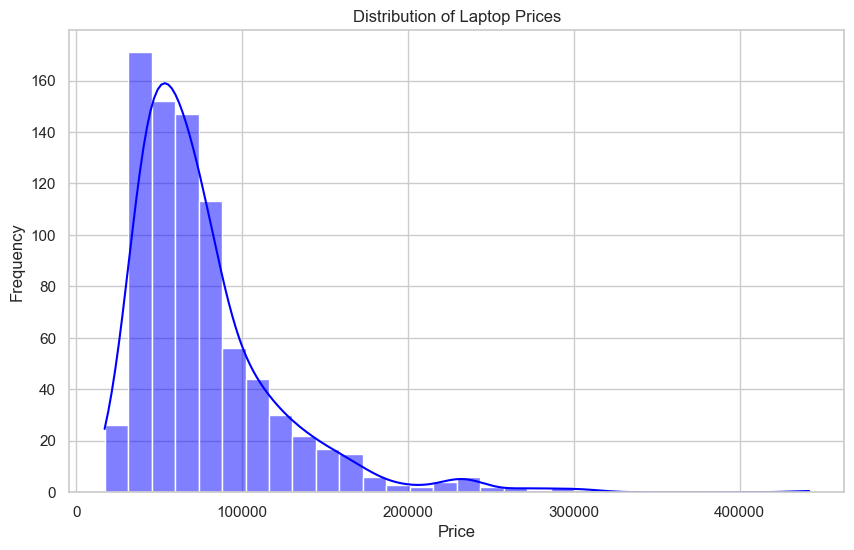

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')

plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

### Bar Charts

##### Average Laptop Price By Brand

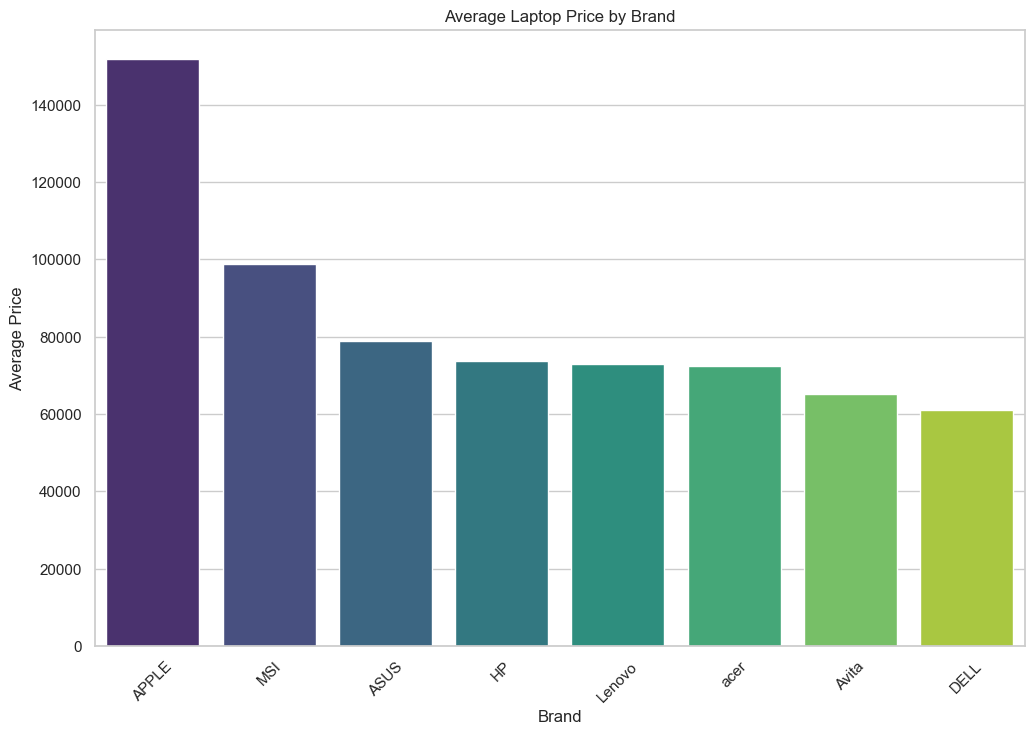

In [12]:
average_price_by_brand = df.groupby('brand')['Price'].mean().reset_index()
average_price_by_brand = average_price_by_brand.sort_values(by='Price', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='brand', y='Price', data=average_price_by_brand, palette='viridis')

plt.title('Average Laptop Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')

plt.xticks(rotation=45)
plt.show()

##### Other Bar Graphs

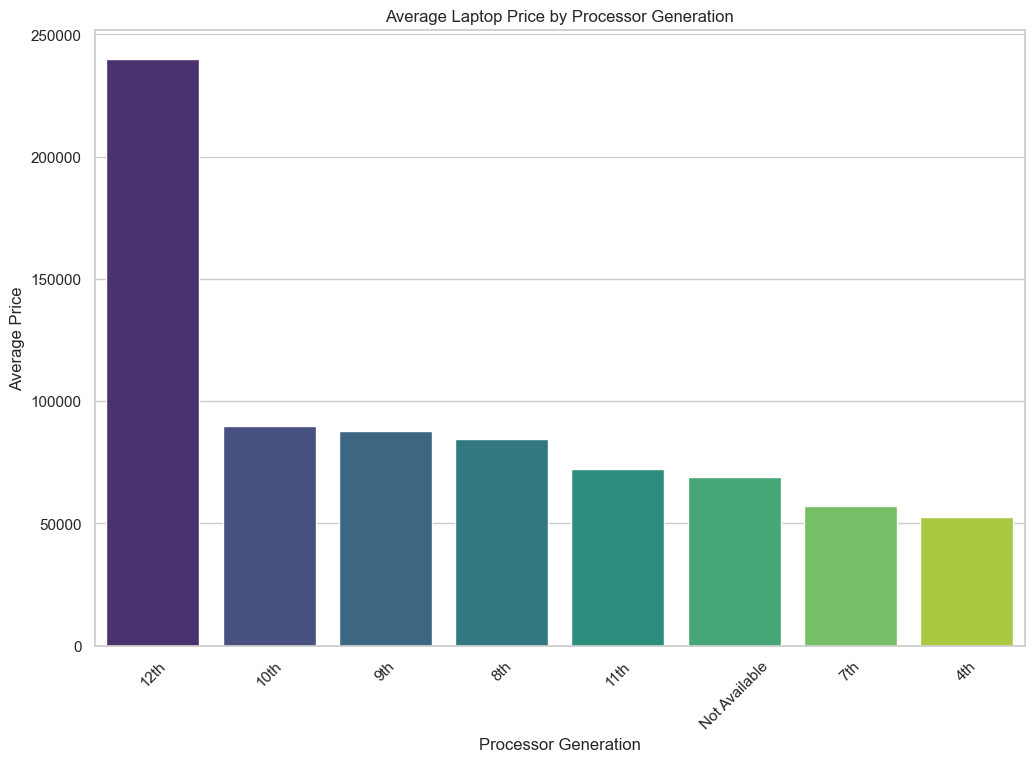

In [17]:
average_price_by_processor_gnrtn = df.groupby('processor_gnrtn')['Price'].mean().reset_index()
average_price_by_processor_gnrtn = average_price_by_processor_gnrtn.sort_values(by='Price', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='processor_gnrtn', y='Price', data=average_price_by_processor_gnrtn, palette='viridis')

plt.title('Average Laptop Price by Processor Generation')
plt.xlabel('Processor Generation')
plt.ylabel('Average Price')

plt.xticks(rotation=45)
plt.show()

##### Pi Chart

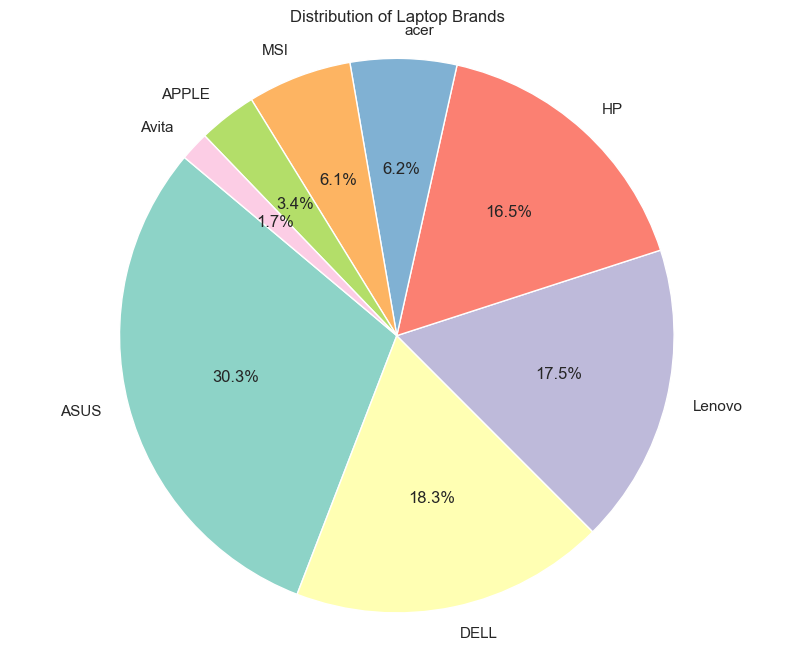

In [22]:
brand_counts = df['brand'].value_counts()
labels = brand_counts.index
sizes = brand_counts.values
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

plt.title('Distribution of Laptop Brands')
plt.axis('equal')
plt.show()

# DATA PREPARATION

### Defining Features and Target (Independant & Dependant Variables)

In [25]:
X = df.drop(columns=['Price'])
y = df['Price']

### Handling Missing Values

In [26]:
missing_data = df.isnull().sum()
print(missing_data)

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
total_storage        0
dtype: int64


As seen above, there are no missing values in the dataset.

### Encoding Categorical Columns

In [27]:
le = LabelEncoder()

for col in X:
    if X[col].dtypes == 'object':
        X[col] = le.fit_transform(X[col])

# MODEL SELECTION AND TRAINING

### Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Car Price Prediction

For Car Price Prediction, We can use multiple algorithms, but we have used the following Regression models:

-  Linear Regression
-  Decision Tree Regressor
-  Random Forest Regressor

### Linear Regression

In [30]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

### Decision Tree Regressor

In [31]:
model_dt = DecisionTreeRegressor(random_state=42)

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

### Random Forest Regressor

In [32]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# MODEL EVALUATION

### Linear Regression

In [33]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr) 
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")

Linear Regression:
Mean Squared Error (MSE): 665840176.93
Root Mean Squared Error (RMSE): 25803.88
Mean Absolute Error (MAE): 16755.52


### Decision Tree Regressor

In [34]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt) 
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

Decision Tree Regressor:
Mean Squared Error (MSE): 1169917499.72
Root Mean Squared Error (RMSE): 34204.06
Mean Absolute Error (MAE): 16516.09


### Random Forest Regressor

In [35]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf) 
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

Random Forest Regressor:
Mean Squared Error (MSE): 502355406.70
Root Mean Squared Error (RMSE): 22413.29
Mean Absolute Error (MAE): 12340.73


# CROSS VALIDATION

In [36]:
k_folds = 3

cv_scores_lr = cross_val_score(model_lr, X, y, scoring='neg_mean_squared_error', cv=k_folds)
mse_scores_lr = -cv_scores_lr 

cv_scores_dt = cross_val_score(model_dt, X, y, scoring='neg_mean_squared_error', cv=k_folds)
mse_scores_dt = -cv_scores_dt

cv_scores_rf = cross_val_score(model_rf, X, y, scoring='neg_mean_squared_error', cv=k_folds)
mse_scores_rf = -cv_scores_rf 

avg_mse_lr = np.mean(mse_scores_lr)
avg_mse_dt = np.mean(mse_scores_dt)
avg_mse_rf = np.mean(mse_scores_rf)

print("Cross-Validation Results:")
print(f"Linear Regression - Average MSE: {avg_mse_lr:.2f}")
print(f"Decision Tree Regressor - Average MSE: {avg_mse_dt:.2f}")
print(f"Random Forest Regressor - Average MSE: {avg_mse_rf:.2f}")

Cross-Validation Results:
Linear Regression - Average MSE: 1587582312.57
Decision Tree Regressor - Average MSE: 1588750138.01
Random Forest Regressor - Average MSE: 1041246494.55


In [40]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,total_storage
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0,1024 GB
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5,1024 GB
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1,1024 GB
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512,0,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0,512 GB
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0,512,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0,512 GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024,0,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0,1024 GB
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024,0,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0,1024 GB
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024,0,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0,1024 GB
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024,0,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0,1024 GB


# NEW PREDICTION

In [41]:
model = RandomForestRegressor()
model.fit(X_train, y_train) 

X_new = [[1, 1, 1, 0, 2, 1, 0, 1024, 2, 1, 0, 0, 3, 0, 0, 1, 3, 0, 0]] 

y_pred = model.predict(X_new)

print(f"Predicted selling price: {y_pred}")

Predicted selling price: [35164.58]


C:\Users\AAC\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
